# Grouping and aggregating data


In [1]:
import pandas as pd

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands_cl.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [3]:
ol_df = orderlines_cl.copy()

In [4]:
ol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                216250 non-null  int64  
 1   id_order          216250 non-null  int64  
 2   product_id        216250 non-null  int64  
 3   product_quantity  216250 non-null  int64  
 4   sku               216250 non-null  object 
 5   unit_price        216250 non-null  float64
 6   date              216250 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.5+ MB


Change `date` to datetime.

In [5]:
ol_df["date"] = pd.to_datetime(ol_df["date"])

## 1.&nbsp; `.groupby` a single feature

Grouping by the product number (SKU), which will give me one line per sku. `.count()` will tell me how many rows have been condensed into each group.

In [6]:
ol_df.groupby("sku").count()

,id,id_order,product_id,product_quantity,unit_price,date
sku,,,,,,
8MO0001-A,2,2,2,2,2,2
8MO0003-A,3,3,3,3,3,3
8MO0007,29,29,29,29,29,29
8MO0008,30,30,30,30,30,30
8MO0009,28,28,28,28,28,28
...,...,...,...,...,...,...
ZAG0041,2,2,2,2,2,2
ZAG0042,1,1,1,1,1,1
ZEP0007,5,5,5,5,5,5


In [7]:
ol_df.shape

(216250, 7)

In [ ]:
# here I use numeric=true as ol_df contains a datetime column, which is excluded by using this parameter
# by default numeric_only = False

ol_df.groupby("sku").sum(numeric_only=True)

,id,id_order,product_id,product_quantity,unit_price
sku,,,,,
8MO0001-A,2731953,813237,0,2,25.92
8MO0003-A,4893267,1557627,0,3,38.55
8MO0007,37205508,10794389,0,30,619.71
8MO0008,38188229,11034203,0,31,651.70
8MO0009,40281947,12270595,0,30,499.60
...,...,...,...,...,...
ZAG0041,3289730,1050270,0,2,39.98
ZAG0042,1641159,523690,0,1,19.99
ZEP0007,6423489,1858331,0,5,685.59


 Select the `product_quantity` and see how many units of each product were sold:

In [ ]:
ol_df.groupby("sku")["product_quantity"].sum()

,product_quantity
sku,
8MO0001-A,2
8MO0003-A,3
8MO0007,30
8MO0008,31
8MO0009,30
...,...
ZAG0041,2
ZAG0042,1
ZEP0007,5


 Sort the values from highest to lowest. With the `.sum()` of `product_quantity`

In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
...,...
PAC2241,1
JBL0156,1
PAC2237,1


Certain number of the largest or smallest numbers,theredore I use.
`.nlargest()` or `.nsmallest()`

In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .sum()
    .nlargest(5)
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618


### 1.1.&nbsp; List of aggregates


* `.count()` – Number of non-null observations
* `.sum()` – Sum of values
* `.mean()` – Mean of values
* `.median()` – Median of values
* `.min()` – Minimum
* `.max()` – Maximum
* `.std()` – Standard deviation

### 1.2.&nbsp; `.agg()`
 Use the `.agg()` method to see multiple aggregates at once.

#### 1.2.1.&nbsp; multiple aggregates for one column
First `.groupby()` the `sku`'s, then take the column `product quantity`, and look at both the `.sum()` and `.count()` of `product_quantity`.Reduce the DataFrame to the 10 largest `sku`"s according to the `.sum()` of `product_quantity`.


In [ ]:
(
    ol_df
    .groupby("sku")["product_quantity"]
    .agg(["sum", "count"])
    .nlargest(10, "sum")
)

,sum,count
sku,,
APP1190,5576,4306
APP0698,2337,1615
WDT0183,1828,1124
APP1922,1663,1560
APP0927,1618,1369
SAM0074,1346,1259
APP1970,1182,1007
APP1221,1131,1108
CRU0051,1122,948


#### 1.2.2.&nbsp; mutliple aggregates for more than one column
 Look at multiple aggregates over multiple columns. Here again `.groupby()` `sku` and take the `.sum()` and `.count()` of `product_quantity`, **and also** look at the `.mean()` of the `unit_price`.

In [ ]:
(
    ol_df
    .groupby("sku")
    .agg({"product_quantity": ["sum", "count"], "unit_price": "mean"})
    .nlargest(10, ("product_quantity", "sum"))
)

product_quantity        unit_price
                     sum count        mean
sku                                       
APP1190             5576  4306   56.014057
APP0698             2337  1615   10.116279
WDT0183             1828  1124  139.061770
APP1922             1663  1560  162.143968
APP0927             1618  1369   17.038773
SAM0074             1346  1259  152.823606
APP1970             1182  1007  362.970417
APP1221             1131  1108  106.131146
CRU0051             1122   948  140.734863
WDT0141             1048   671  109.266259

## 2.&nbsp; `.groupby()` multiple features
It's also possible to `.groupby()` multiple categories. Let's see how many products we sold each month.

In [ ]:
(
    ol_df
    .groupby([ol_df["date"].dt.year,
              ol_df["date"].dt.month])["product_quantity"]
    .sum()
 )

date  date
2017  1       22363
      2       14616
      3       12443
      4       13781
      5       11665
      6       11221
      7       15347
      8       11530
      9       12213
      10      15387
      11      33082
      12      24455
2018  1       23810
      2       15831
      3        8067
Name: product_quantity, dtype: int64

### 1.4.&nbsp; `.groupby()` aggregate plotting
 Quickly plot aggregates with `.groupby()`, which can help better understand the data. Let's plot the above values showing how many products have been sold each month.

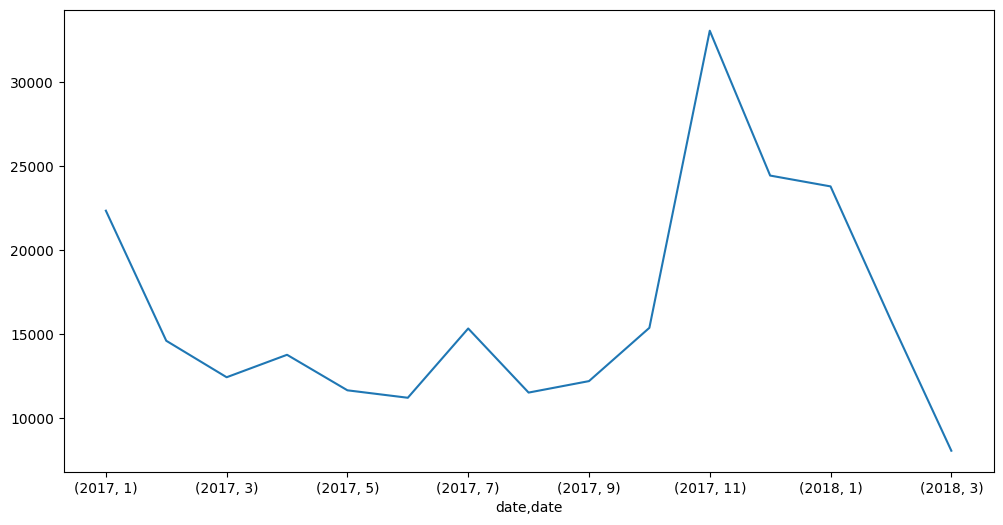

In [ ]:
(
    ol_df.groupby([ol_df["date"].dt.year,
                   ol_df["date"].dt.month])["product_quantity"]
    .sum()
    .plot(figsize=(12, 6))
);

## 3.&nbsp; `.resample()`

Resampling allows to easily aggregate time series data. When using `.resample()`, you have to define:
- The frequency of time for which to group the data (e.g. 5 minutely, hourly, daily...) expressed as a "frequency string" (`"W"` for weekly, `"M"` for monthly...).
- The column with the dates group by needs to be passed to the `on` parameter (unless you want group by the index).
- The aggregate function (`sum()`, `count()`, `mean()`...)
- The numerical column/s to aggregate.

With this you can recreate our groupby above, where I looked at the amount of products sold each month. The date displayed is the last day of the given month.

In [ ]:
(
    ol_df
    .resample("M", on="date")["product_quantity"]
    .sum()
    .sort_values(ascending=False)
)

,product_quantity
date,
2017-11-30,33082
2017-12-31,24455
2018-01-31,23810
2017-01-31,22363
2018-02-28,15831
2017-10-31,15387
2017-07-31,15347
2017-02-28,14616
2017-04-30,13781


A quick plot of daily graph for the amount of products sold.

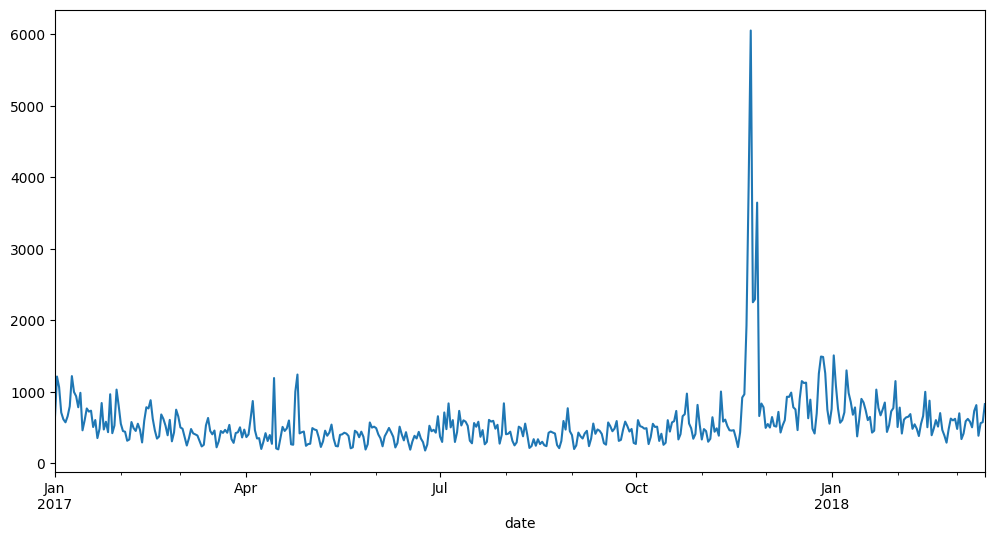

In [ ]:
(
    ol_df
    .resample("D", on="date")
    .sum()["product_quantity"]
    .plot(figsize=(12, 6))
 );

Same graph as above using `.groupby()`.

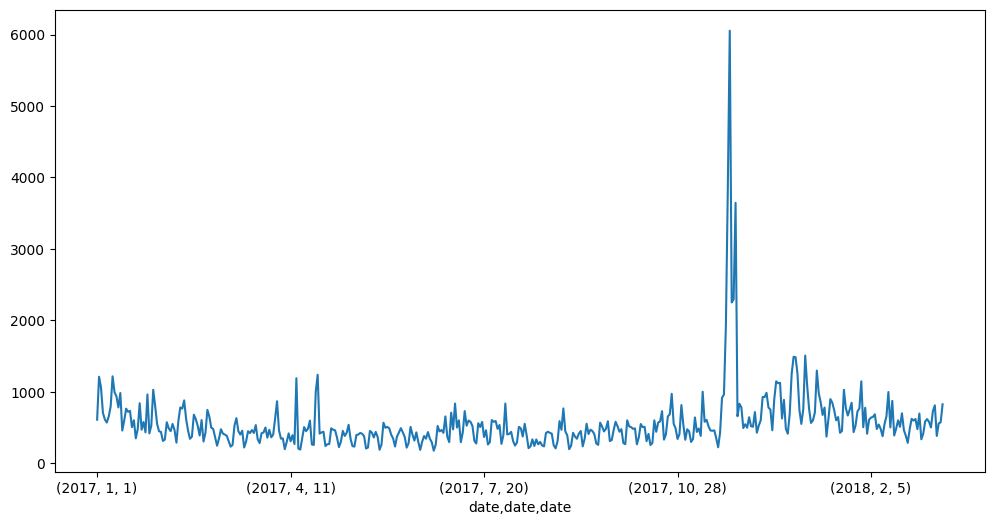

In [ ]:
(
    ol_df
    .groupby([ol_df.date.dt.year,
              ol_df.date.dt.month,
              ol_df.date.dt.day])["product_quantity"]
    .sum()
    .plot(figsize=(12, 6))
 );

# Challenges

##1. What are the top 8 most sold products?

In [ ]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
(
    ol_df
    .groupby("sku")
    .agg({"product_quantity": "sum"})
    .nlargest(8, "product_quantity")
)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
SAM0074,1346
APP1970,1182
APP1221,1131


In [ ]:
ol_df.groupby("sku")["product_quantity"].sum().nlargest(8)

,product_quantity
sku,
APP1190,5576
APP0698,2337
WDT0183,1828
APP1922,1663
APP0927,1618
SAM0074,1346
APP1970,1182
APP1221,1131


##2. How many products did each of the 5 largest orders contain?

In [ ]:
(
    ol_df
    .groupby("id_order")["product_quantity"]
    .agg(["sum"])
    .nlargest(5, "sum")
)

,sum
id_order,
346221,999
349475,800
349133,555
335057,202
417536,200


##3.I want to see how busy the days of the week are to know when we need more staff. I Rank the days of the week from busiest to least busy.


<Axes: ylabel='date'>

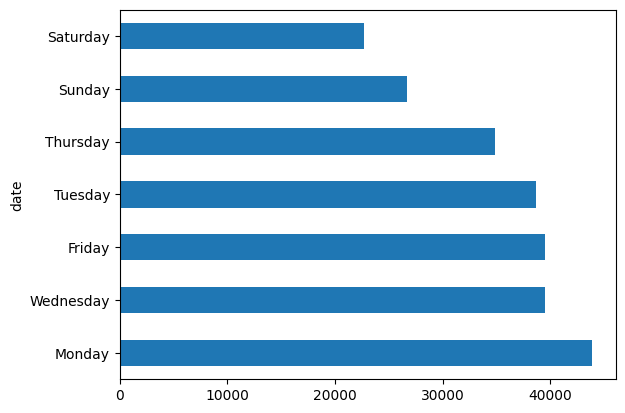

In [ ]:
(ol_df
 .groupby(ol_df["date"].dt.day_name())
 ["product_quantity"].sum()
 .sort_values(ascending=False)
 .plot(kind="barh")
 )

##4. Which brands sell the most products?

In [ ]:
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [ ]:
brands

,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [ ]:
ol_df["brand"] = ol_df["sku"].str[:3]
ol_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,brand
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,OTT
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,LGE
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,PAR
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,WDT
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,JBL
...,...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,JBL
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,PAC
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,APP
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,BEZ


In [ ]:
(orders_cl
        .loc[orders_cl["state"] == "Completed"]
        .merge(ol_df,
               left_on="order_id",
               right_on="id_order",
               how="left")
        .merge(brands,
               left_on="brand",
               right_on="short",
               how="left")
        .groupby("long")
        ["product_quantity"]
        .sum()
        .nlargest()
        )


,product_quantity
long,
Apple,11729.0
OWC,4027.0
Western Digital,2561.0
Crucial,2433.0
Belkin,2383.0


##5. Plot a line chart for the amount of orders each hour of November 2017

In [ ]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


In [ ]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])

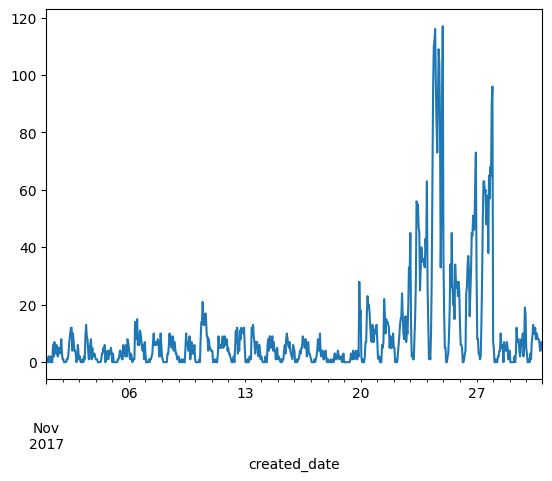

In [ ]:
(
   orders_cl.loc[(orders_cl["created_date"].between("2017-11-01", "2017-12-01")) & (orders_cl["state"] == "Completed") , :]
   .resample("H", on="created_date")
   ["order_id"]
   .count()
   .plot()
);